# Programming 3

# (a)

In [7]:
from nbayes import nbayes

dataSets = ['/voting', '/volcanoes']
iterationNums = [1, 30]

accuracyData = list()
accuracyData.append(['', 'base learner', 'boosted learner'])
for i in range(2):
    row = list()
    row.append('nbayes - '+ dataSets[i])
    for j in range(2):
        accuracy, accuracySD, precision, precisionSD, recall, recallSD, areaUnderROC = nbayes(dataSets[i], 1, iterationNums[j])
        row.append('%.03f' % accuracy)
    accuracyData.append(row)

    
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(accuracyData, tablefmt='html')))

,base learner,boosted learner
nbayes - /voting,0.982,0.995
nbayes - /volcanoes,0.633,0.957


In [3]:
# implement paired t-test
import scipy.stats as stats
pre = [0.982, 0.633]
post = [0.995, 0.957]
t, p = stats.ttest_rel(pre, post)
if p < 0.5:
    print('This ensemble learner is significantly better than the base learner with 95% confidence.')

This ensemble learner is significantly better than the base learner with 95% confidence.


# (b)

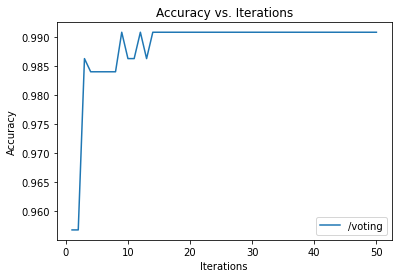

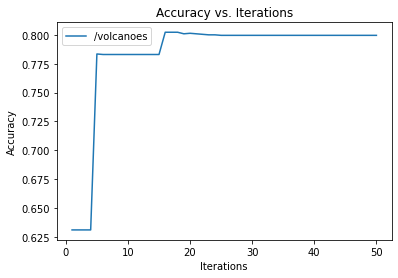

In [4]:
from logregNB import logreg
from matplotlib import pyplot as plt

dataSets = ['/voting', '/volcanoes']

for i in range(2):
    accuracyData = logreg(dataSets[i], 1, 50)
    plt.plot(range(1,51), accuracyData, label=dataSets[i])

    plt.title('Accuracy vs. Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Our Findings
For part b, we picked voting and volcanoes datasets and use logistic regression as the classifier to boost. From the first iteration to the 50th iteration, we observe that there is an increase for both datasets. The overall accuracy for voting is higher than the overall accuracy for volcanoes.   At the 3rd iteration, there is a significant boost for the voting dataset. 
Compared to volcanoes datasets, the accuracy at each iteration seems less stable where we observe an increase in one iteration but a decrease in the iteration right after, but the overall increase of accuracy is positive. Since the overall accuracy is already high, a few noise can cause the swing of accuracies because the classifier is trying to learn that few noise. 
As for volcano dataset, at the 5th iteration, we observe that there is a significant boost. Around the 20th iteration, we observe that there is a slight decrease in accuracy that may due to the some potential noise in the data. 

# (c)

## Research hypothesis

From the b part, we notice how noise influences the accuracy and performance of the boosting algorithm. Since boosting algorithms are dependent on the weights of the examples and the correctness of example classifications, if the example is a noise, it is difficult for the classifier to include it in and thus will have a large weight, which will result in worse performance. Thus, we want to research further about how noise influences the AdaBoost algorithm and some algorithm to solve this problem.

We have thought of two ways to solve the noise:
   1. a method to detect and remove the noise data
   2. use weight control term (something similar to weight penalty term in logreg) to prevent some examples having super large weights

Also, during the research about Adaboost variants, we noticed that there are two improved Adaboost algorithms: Adaboost.M1, Adaboost.M2, which has similar logic structure, but with different details, such as weight update function. We are curious about how the performance of Adaboost, Adaboost.M1, and Adaboost.M2 differs and what kind of properties they have.

## 1.1 Comparasion about the performance on datasets with different number of noise

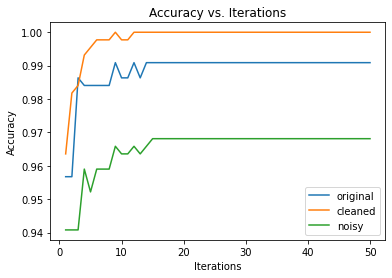

In [7]:
from logregNB import logreg
from matplotlib import pyplot as plt

accuracyData = logreg('/voting', 1, 50)
plt.plot(range(1,51), accuracyData, label='original')

accuracyData = logreg('/voting_clean', 1, 50)
plt.plot(range(1,51), accuracyData, label='cleaned')

accuracyData = logreg('/voting_noisy', 1, 50)
plt.plot(range(1,51), accuracyData, label='noisy')

plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The cleaned dataset has highest accuracy with no doubt, but what is interesting is that how noise is related to the learning progress. Although all three models comes to be stable after around 15 iteratioins, the degree of struggle of the algorithm is directly related to the number of noise. As noise increased, the algorithm becomes more struggled about whether should learn more on  noise example with larger weights or learn normal example with higher accuracy. Since Ababoost depends on the weights of the data, which is also dependent on the error and difference between true label and estimated label. Thus, noise example often get larger weights in the end with added error close to 0.5. And then, since error increased, the algorithm will learn more on normal example again. Therefore, we think if the algorithm can figure out noise example and clean it automatically, it will have better performance. And Here is our algorithm to do that.

From the observations we have, we apply a noise peeling method to the dataset after its original boosting. After the original boosting of t iterations, we will obtain a set of classifiers with its associated alpha. We then use these it to compute the margin for each data point, where m = true_class_label * the sum of (alpha_t * predicted_label_t). From the calculated m, we determine that if m is smaller than 0, the classifier consistently classify it wrong, therefore it has a large probability to be a noise data. 

## 1.2 A method of detect and remove noise during Adaboost

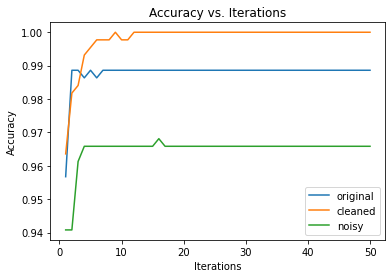

In [1]:
from logregR1 import logreg
from matplotlib import pyplot as plt

accuracyData = logreg('/voting', 1, 50)
plt.plot(range(1,51), accuracyData, label='original')

accuracyData = logreg('/voting_clean', 1, 50)
plt.plot(range(1,51), accuracyData, label='cleaned')

accuracyData = logreg('/voting_noisy', 1, 50)
plt.plot(range(1,51), accuracyData, label='noisy')

plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As we can see, the algorithm shows better stability even if in the noisy dataset. Compared to the graph above, the original and noisy model are much more stable and achieve the same probability faster. In other words, the noise will increase the need for more iterations and time to achieve the same performance. The cleaned one is similar to the normal algorithm because it is close to accuracy=1 and there is no noise that is needed to be cleaned. Thus, removing noise can improve the Adaboost stability and decrease the iterations and time requirement.

## 2. Weight Control Term

One other method we propose to control the effect of noise data on the overall error epsilon is adding a weight control term when updating weight each iteration. The weight control term is the minimum data weight times 0.01. By adding this weight control term, we minimize the difference between each data weight; therefore, decrease the data weight of the noise data in the later iterations. Since we know that voting has only a few noise, we apply this method on voting dataset. 

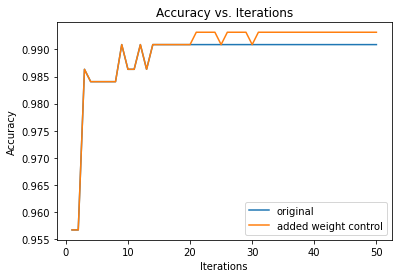

In [4]:
from logregNB import logreg as logreg1
from logregR4 import logreg as logreg2
from matplotlib import pyplot as plt

accuracyData = logreg1('/voting', 1, 50)
plt.plot(range(1,51), accuracyData, label='original')

accuracyData = logreg2('/voting', 1, 50)
plt.plot(range(1,51), accuracyData, label='added weight control')

plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The original Adaboost would stop boosting when the accuracy reaches 0.990. However, we observe that with the added weight control term, the accuracy eventually converge to 0.993. From the first part of our research, we notice that there are exactly 3 noise data that the classifier could not learn. Through the weight control term, we relatively lowered their weight so that the new boosted classifier can perfectly distinguish all non noise dat and classify those perfectly, where 0.993 x 440 = 437.

## 3. AD Adaboost

AD Adaboost is an Adaboost variant that aims to introduce cascade method to improve the performance of recorgnizing positive examples. THe main difference with the normal Adaboost is that it use a different classifier weight: alpha = 0.5 * ln((1-error)/error)+k*e^(TP_weight), where k is a number that keeps the min error upper bound decreasing. As we researched, some paper suggests to use k=1/120 for any classifer with error<0.494. However, As tested below, we found the best value for voting is k=1/79 while the best value for volcanoes is 1/80.

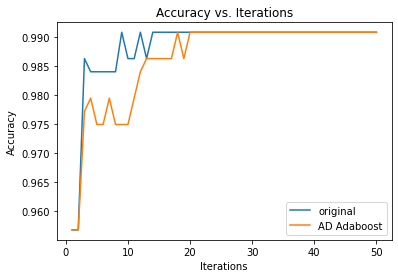

In [1]:
from logregNB import logreg as logreg1
from logregR7 import logreg as logreg2
from matplotlib import pyplot as plt

accuracyData = logreg1('/voting', 1, 50)
plt.plot(range(1,51), accuracyData, label='original')

accuracyData = logreg2('/voting', 1, 50, 1/79)
plt.plot(range(1,51), accuracyData, label='AD Adaboost')

plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

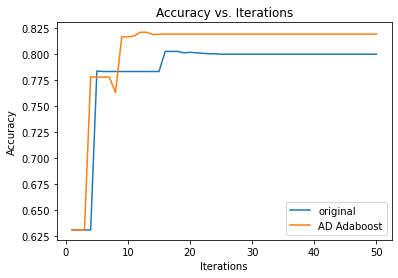

In [2]:
from logregNB import logreg as logreg1
from logregR7 import logreg as logreg2
from matplotlib import pyplot as plt

accuracyData = logreg1('/volcanoes', 1, 50)
plt.plot(range(1,51), accuracyData, label='original')

accuracyData = logreg2('/volcanoes', 1, 50, 1/80)
plt.plot(range(1,51), accuracyData, label='AD Adaboost')

plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

However, it still cannot reach higher accuracy in the volcanoes dataset. Thus, we researched it further. We found the positive:negative rate for volcanoes is about 1:2 where there are 1500 negative examples and 731 positive examples while many papers suggest the best rate is 1:1.2 to 1: 1.4. And the paper of AD Adaboost also mentioned the distribution of the training sample is also very influential to the performance of AD Adaboost. Since AD Adaboost pays more attention to learn the True Positive examples, the positive/negative rate will be very important to the performance. Thus, further effort can be finding a method to balance the positive/negative example rate during the Adaboost.